<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [ ]:
student_number = '403210725'
Name = 'Farzan'
Last_Name = 'Rahmani'

In [ ]:
print('Student Number: {}'.format(student_number))
print('Name: {}'.format(Name))
print('Last Name: {}'.format(Last_Name))

Student Number: 403210725
Name: Farzan
Last Name: Rahmani


# Libraries

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [ ]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    # TODO: Generate dataset
    np.random.seed(42)
    X = np.random.uniform(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.2*X**6 - 0.5*X**5 + 2*X**4 - 5*X**3 + 3*X**2 - 10*X + 5 + noise
    X = X.reshape(-1, 1)

    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

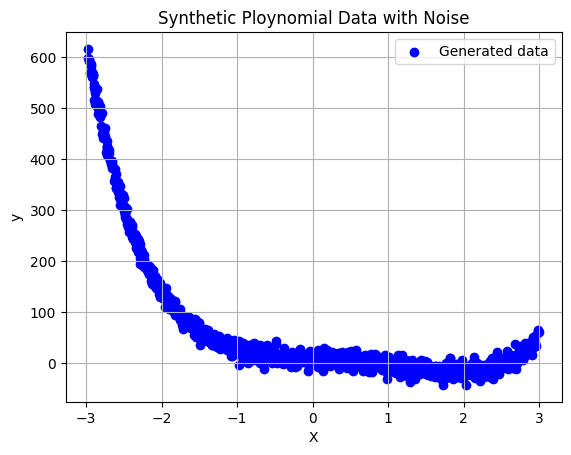

In [ ]:
X, y = generate_dataset(-3, 3)

# TODO: Visualize the dataset using scatter
plt.scatter(X, y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Ploynomial Data with Noise')
plt.legend(['Generated data'])
plt.grid(True)
plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [ ]:
# TODO: Split dataset into the training and the in-range testing sets
X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Generate the out-of-range testing set
# X_test_out_of_range = np.random.uniform(5, 7, len(X_test_in_range)).reshape(-1, 1)
# y_test_out_of_range = 0.2*X_test_out_of_range**6 - 0.5*X_test_out_of_range**5 + 2*X_test_out_of_range**4 - 5*X_test_out_of_range**3 + 3*X_test_out_of_range**2 - 10*X_test_out_of_range + 5 + np.random.normal(0, 10, len(X_test_in_range))
X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, num_samples=len(X_test_in_range))

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

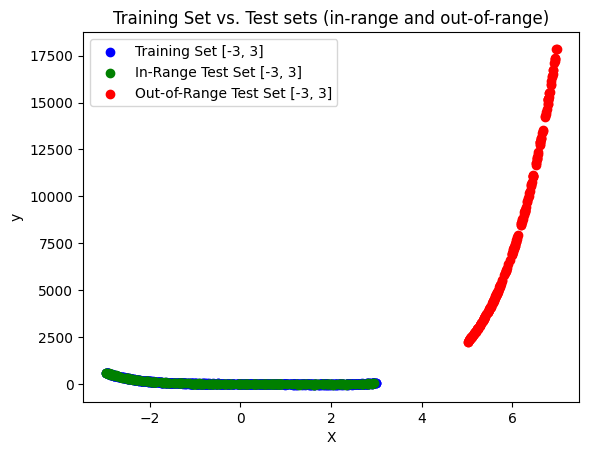

In [ ]:
# TODO: Visualize the sets using scatter (or other plots)
plt.scatter(X_train, y_train, color='blue', label='Training Set [-3, 3]')
plt.scatter(X_test_in_range, y_test_in_range, color='green', label='In-Range Test Set [-3, 3]')
plt.scatter(X_test_out_of_range, y_test_out_of_range, color='red', label='Out-of-Range Test Set [-3, 3]')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Set vs. Test sets (in-range and out-of-range)')
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [ ]:
def train_models(X, y, degree):
    # TODO: Create and train a model based on the given degree
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    return model

In [ ]:
models = {}
degree = 9

# TODO: Add the trained models with different degrees to the dict
for degree in range(1, degree + 1):
    models[degree] = train_models(X_train, y_train, degree)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [ ]:
def evaluate_models(models, X_test, y_test):
    # TODO: Calculate MSE of each model (on the input test set).
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test)
        losses[degree] = mean_squared_error(y_test, y_pred)

    return losses

In [ ]:
# TODO: Evaluate models on both the train and the test sets.
train_mse = evaluate_models(models, X_train, y_train)
test_in_range_mse = evaluate_models(models, X_test_in_range, y_test_in_range)
test_out_of_range_mse = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

In [ ]:
train_mse

{1: 8383.578493054698,
 2: 2447.06571357504,
 3: 869.4166604055874,
 4: 123.98365758868175,
 5: 105.41614268023497,
 6: 99.33480197061523,
 7: 99.24768585399015,
 8: 99.0616307225485,
 9: 98.77328641180138}

In [ ]:
test_in_range_mse

{1: 11487.35376021912,
 2: 3223.851388190553,
 3: 934.6805222124251,
 4: 121.56440343437902,
 5: 94.36445168799214,
 6: 87.85113860588216,
 7: 88.17346623990464,
 8: 88.4410765222563,
 9: 88.09435709690533}

In [ ]:
test_out_of_range_mse

{1: 87744220.01675671,
 2: 71394910.04524066,
 3: 107336231.67448154,
 4: 25226579.832300834,
 5: 70040551.82394011,
 6: 205789.70226266177,
 7: 18877860.997733016,
 8: 390938806.27391416,
 9: 21415053164.466827}

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

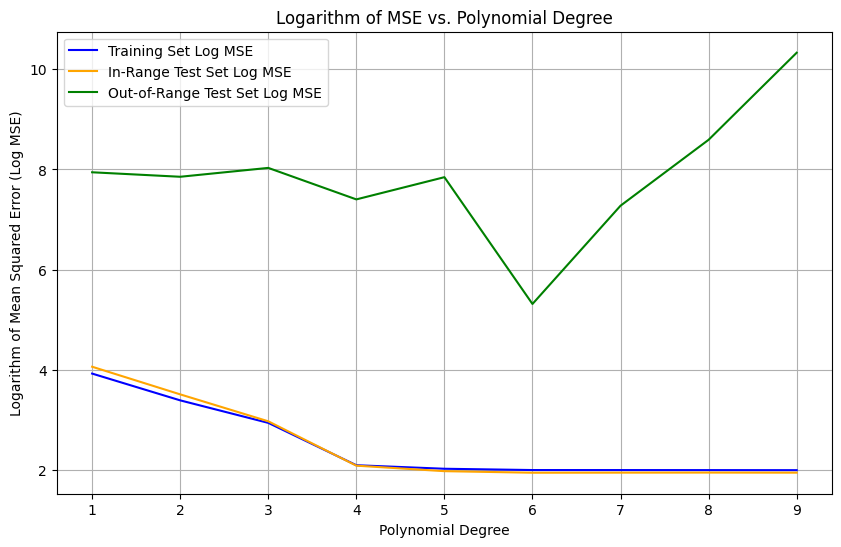

In [ ]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
degrees = list(train_mse.keys())
log_train_mse = np.log10(list(train_mse.values()))
log_test_in_range_mse = np.log10(list(test_in_range_mse.values()))
log_test_out_of_range_mse = np.log10(list(test_out_of_range_mse.values()))

# TODO: Plot the log MSE results
plt.figure(figsize=(10, 6))
plt.plot(degrees, log_train_mse, label='Training Set Log MSE', color='blue')
plt.plot(degrees, log_test_in_range_mse, label='In-Range Test Set Log MSE', color='orange')
plt.plot(degrees, log_test_out_of_range_mse, label='Out-of-Range Test Set Log MSE', color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error (Log MSE)')
plt.title('Logarithm of MSE vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

for degree in degrees:
    print(f"Degree {degree} - Train MSE: {train_mse[degree]:.4f}, In-Range Test MSE: {test_in_range_mse[degree]:.4f}, Out-of-Range Test MSE: {test_out_of_range_mse[degree]:.4f}")

Degree 1 - Train MSE: 8383.5785, In-Range Test MSE: 11487.3538, Out-of-Range Test MSE: 87744220.0168
Degree 2 - Train MSE: 2447.0657, In-Range Test MSE: 3223.8514, Out-of-Range Test MSE: 71394910.0452
Degree 3 - Train MSE: 869.4167, In-Range Test MSE: 934.6805, Out-of-Range Test MSE: 107336231.6745
Degree 4 - Train MSE: 123.9837, In-Range Test MSE: 121.5644, Out-of-Range Test MSE: 25226579.8323
Degree 5 - Train MSE: 105.4161, In-Range Test MSE: 94.3645, Out-of-Range Test MSE: 70040551.8239
Degree 6 - Train MSE: 99.3348, In-Range Test MSE: 87.8511, Out-of-Range Test MSE: 205789.7023
Degree 7 - Train MSE: 99.2477, In-Range Test MSE: 88.1735, Out-of-Range Test MSE: 18877860.9977
Degree 8 - Train MSE: 99.0616, In-Range Test MSE: 88.4411, Out-of-Range Test MSE: 390938806.2739
Degree 9 - Train MSE: 98.7733, In-Range Test MSE: 88.0944, Out-of-Range Test MSE: 21415053164.4668


In [ ]:
# TODO: Print each model loss on the training and the two test sets
print(f"Degree \t\t Train MSE \t\t In-Range Test MSE \t Out-of-Range Test MSE")
for d in range(degree):
    print(f"{d} \t\t {log_train_mse[d]:.4f} \t\t {log_test_in_range_mse[d]:.4f} \t\t {log_test_out_of_range_mse[d]:.4f}")

Degree 		 Train MSE 		 In-Range Test MSE 	 Out-of-Range Test MSE
0 		 3.9234 		 4.0602 		 7.9432
1 		 3.3886 		 3.5084 		 7.8537
2 		 2.9392 		 2.9707 		 8.0307
3 		 2.0934 		 2.0848 		 7.4019
4 		 2.0229 		 1.9748 		 7.8453
5 		 1.9971 		 1.9437 		 5.3134
6 		 1.9967 		 1.9453 		 7.2760
7 		 1.9959 		 1.9467 		 8.5921
8 		 1.9946 		 1.9449 		 10.3307


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** The bias-variance tradeoff is evident from the results. Low-degree models(less complex models) underfit, leading to high bias (high training and test error). High-degree models(more complex models) overfit, leading to low bias but high variance (low training error but high test error). The best balance is achieved at an intermediate degree.

    In other words:
    - For lower degrees (1-3), the model underfits, showing high bias (high error on all sets).
    - As the degree increases (4-6), the model fits better, reducing both training and in-range test errors.
    - For higher degrees (7-9), the model starts to overfit, showing low training error but increasing in-range and out-of-range test errors (high variance).
</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?



- <span style="color:cyan;">**Answer:** Model complexity increases with polynomial degree, causing overfitting as the degree increases. This understanding helps select a degree that minimizes both training and test errors, balancing model complexity and performance.

    - Underfitting: Low-degree models have high error on all sets due to lack of complexity.
    - Good fit: Mid-degree models balance between training and test performance.
    - Overfitting: High-degree models show very low training error but increasing test errors, especially out-of-range.

  This understanding helps in selecting an appropriate degree by looking for the point where test error starts to increase while training error continues to decrease. In this case, a polynomial of degree 5 or 6 is optimal.
</span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients.

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [138]:
file_path = "./InsuranceData.csv"
# TODO: Load the Dataset
df = pd.read_csv(file_path)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [139]:
# TODO: you can use .info() and .description()
print("\nDataset Info:\n")
df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [140]:
print("\nDataset Description:\n")
df.describe()


Dataset Description:



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [141]:
# EDA: Check for missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


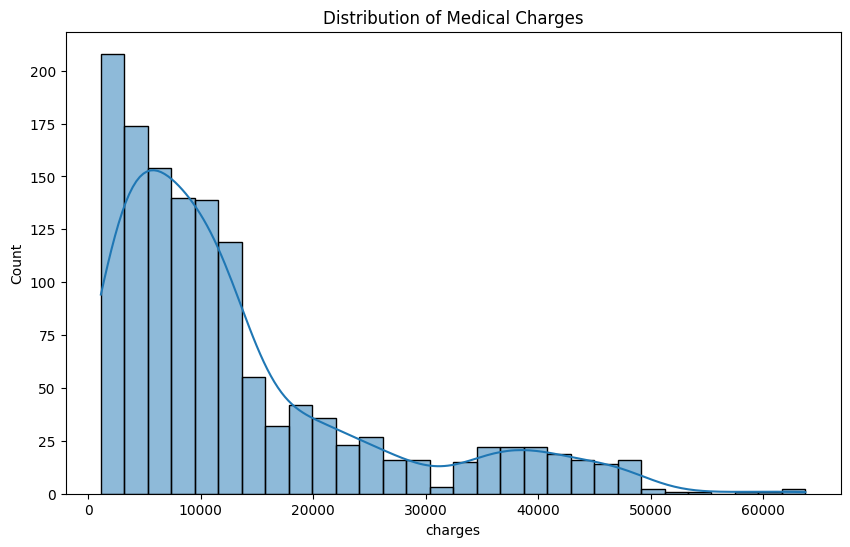

In [142]:
# Visualize the distribution of the charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Medical Charges')
plt.show()

# Preprocessing

In [143]:
# TODO: apply any pre processing method you think is necessary
# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.

# Label encoding for categorical features (Encode categorical variables)
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


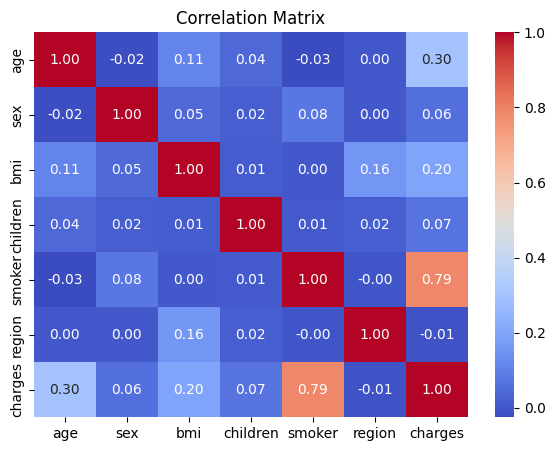

In [144]:
# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [145]:
# Feature and target separation
X = df.drop(columns=['charges'])
y = df['charges']

In [146]:
scaler = StandardScaler()
X[['age', 'bmi']] = scaler.fit_transform(X[['age', 'bmi']])
X

,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.453320,0,1,3
1,-1.509965,1,0.509621,1,0,2
2,-0.797954,1,0.383307,3,0,2
3,-0.441948,1,-1.305531,0,0,1
4,-0.513149,1,-0.292556,0,0,1
...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,1
1334,-1.509965,0,0.206139,0,0,0
1335,-1.509965,0,1.014878,0,0,2
1336,-1.296362,0,-0.797813,0,0,3


In [147]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

Fit a linear regressor to the data.

In [148]:
# TODO: Use sklearn
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [149]:
# Predict and evaluate
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# Metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Linear Regression Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
print(f"Linear Regression Train MAPE: {train_mape:.2f}, Test MAPE: {test_mape:.2f}")

Linear Regression Train MSE: 37280663.22, Test MSE: 33635210.43
Linear Regression Train MAPE: 0.42, Test MAPE: 0.47


Get the coefficients of the variables and visualize it

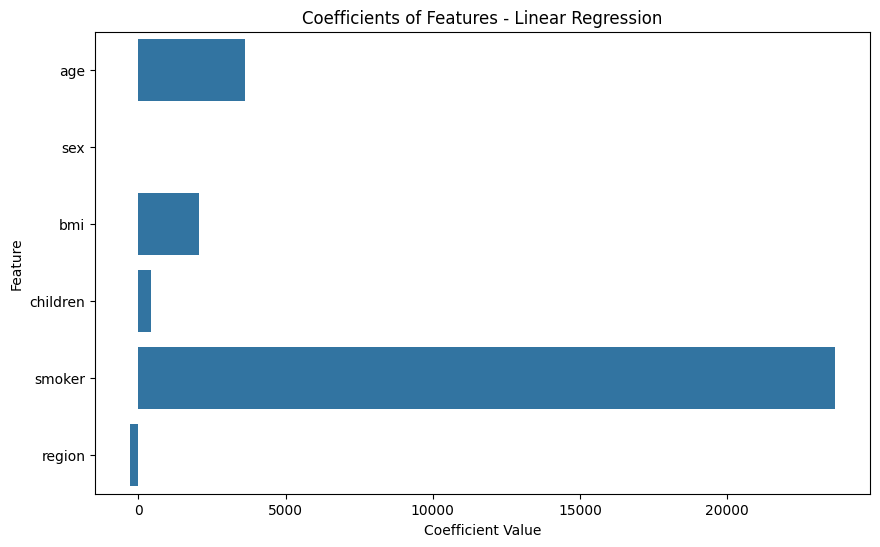

In [150]:
# TODO:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lin_reg.coef_})
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
# sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="coolwarm")
plt.title('Coefficients of Features - Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [151]:
# TODO: Use Lasso from sklearn library

# Lasso Regression (L1 Regularization)
lasso_reg = Lasso(alpha=.1)
lasso_reg.fit(X_train, y_train)

# Predict and evaluate
lasso_pred_train = lasso_reg.predict(X_train)
lasso_pred_test = lasso_reg.predict(X_test)

lasso_train_mse = mean_squared_error(y_train, lasso_pred_train)
lasso_test_mse = mean_squared_error(y_test, lasso_pred_test)

lasso_train_mape = mean_absolute_percentage_error(y_train, lasso_pred_train)
lasso_test_mape = mean_absolute_percentage_error(y_test, lasso_pred_test)

print(f"Lasso Train MSE: {lasso_train_mse:.2f}, Test MSE: {lasso_test_mse:.2f}")
print(f"Lasso Train MAPE: {lasso_train_mape:.2f}, Test MAPE: {lasso_test_mape:.2f}")

Lasso Train MSE: 37280663.37, Test MSE: 33635611.32
Lasso Train MAPE: 0.42, Test MAPE: 0.47


<ipython-input-154-eadf726d6e3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="coolwarm")


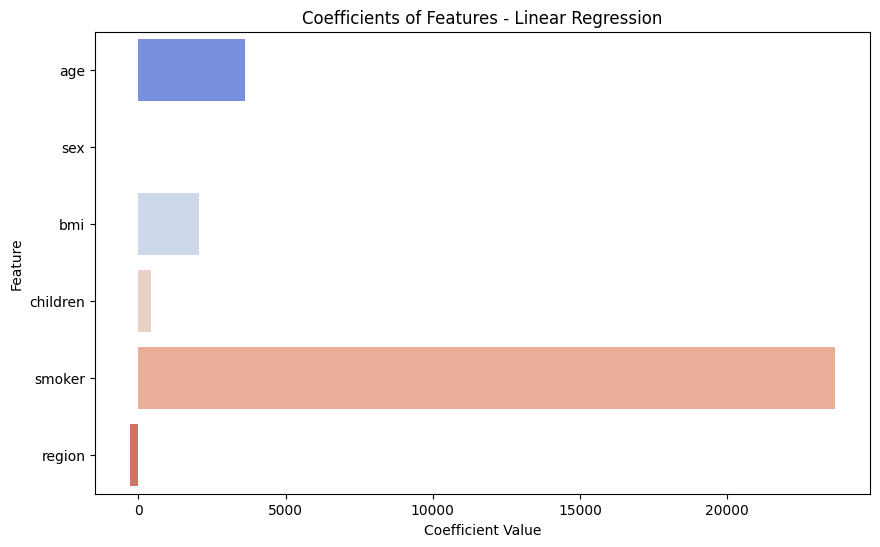

In [154]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_reg.coef_})
plt.figure(figsize=(10, 6))
# sns.barplot(x='Coefficient', y='Feature', data=coefficients)
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="coolwarm")
plt.title('Coefficients of Features - Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [155]:
# TODO: Use Ridge from sklearn library

# Ridge Regression (L2 Regularization)
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predict and evaluate
ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)

ridge_train_mse = mean_squared_error(y_train, ridge_pred_train)
ridge_test_mse = mean_squared_error(y_test, ridge_pred_test)

ridge_train_mape = mean_absolute_percentage_error(y_train, ridge_pred_train)
ridge_test_mape = mean_absolute_percentage_error(y_test, ridge_pred_test)

print(f"Ridge Train MSE: {ridge_train_mse:.2f}, Test MSE: {ridge_test_mse:.2f}")
print(f"Ridge Train MAPE: {ridge_train_mape:.2f}, Test MAPE: {ridge_test_mape:.2f}")

Ridge Train MSE: 37283675.38, Test MSE: 33675720.38
Ridge Train MAPE: 0.42, Test MAPE: 0.47


<ipython-input-156-546c006398d1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="coolwarm")


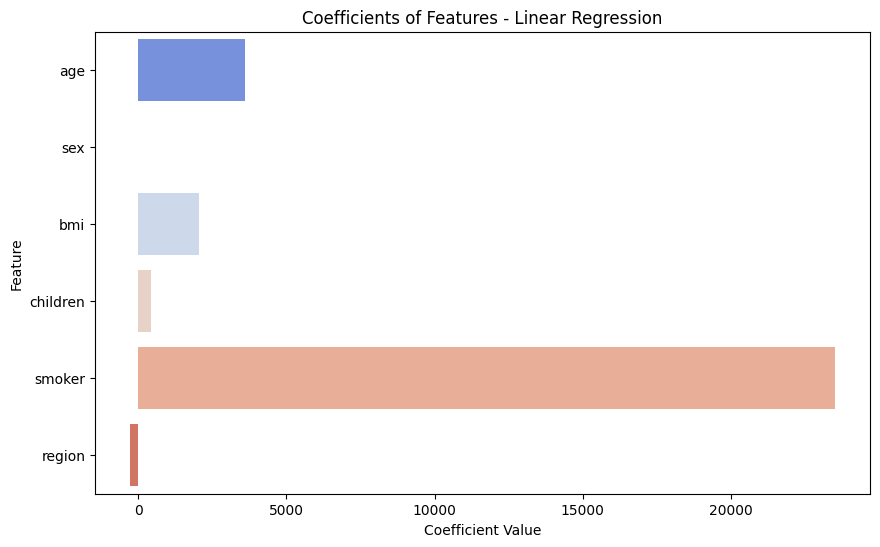

In [156]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_reg.coef_})
plt.figure(figsize=(10, 6))
# sns.barplot(x='Coefficient', y='Feature', data=coefficients)
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette="coolwarm")
plt.title('Coefficients of Features - Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

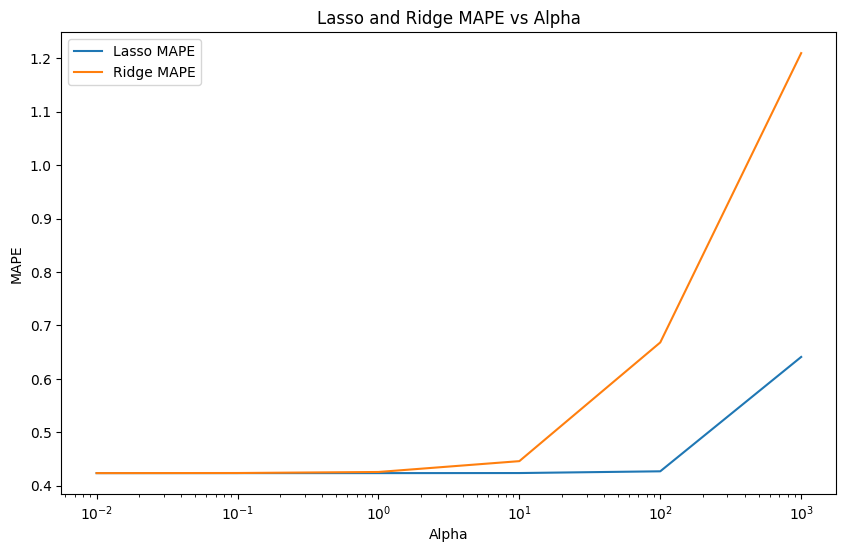

In [167]:
# TODO: Use folding methods and mape from sklearn library

# using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation. ????
alphas = [0.01, 0.1, 1, 10, 100, 1000]
lasso_mape_scores = []
ridge_mape_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)

    # lasso.fit(X_train, y_train)
    # ridge.fit(X_train, y_train)
    # lasso_mape = mean_absolute_percentage_error(y_test, lasso.predict(X_test))
    # ridge_mape = mean_absolute_percentage_error(y_test, ridge.predict(X_test))

    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    lasso_mape = -np.mean(cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error'))
    ridge_mape = -np.mean(cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error'))


    lasso_mape_scores.append(lasso_mape)
    ridge_mape_scores.append(ridge_mape)

plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_mape_scores, label='Lasso MAPE')
plt.plot(alphas, ridge_mape_scores, label='Ridge MAPE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAPE') # Mean Absolute Percentage Error
plt.title('Lasso and Ridge MAPE vs Alpha') # Alpha = Regularization Parameter
plt.legend()
plt.show()

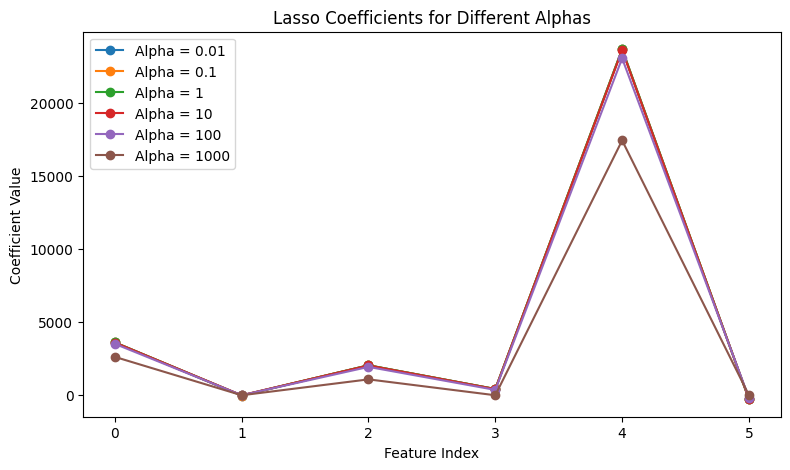

In [168]:
# Visualize coefficients for different alphas
plt.figure(figsize=(9, 5))
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    plt.plot(lasso.coef_, 'o-', label=f'Alpha = {alpha}')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients for Different Alphas')
plt.legend()
plt.show()

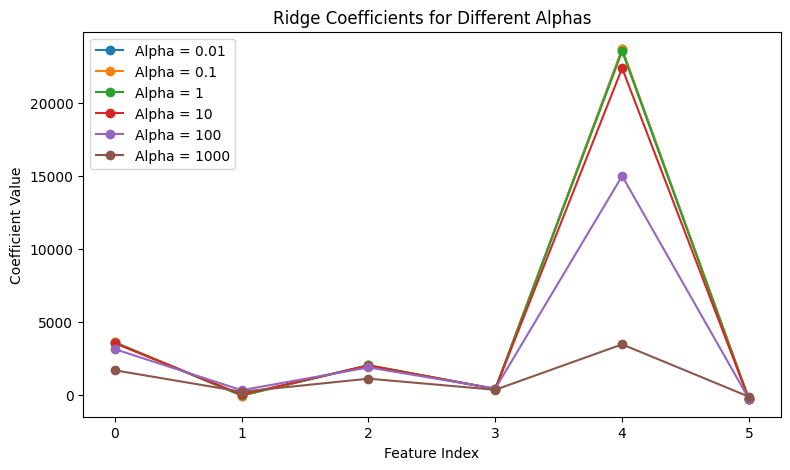

In [169]:
# Visualize coefficients for different alphas
plt.figure(figsize=(9, 5))
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    plt.plot(ridge.coef_, 'o-', label=f'Alpha = {alpha}')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients for Different Alphas')
plt.legend()
plt.show()

Add extra variables to dataset to make model more complex, then compare the results.

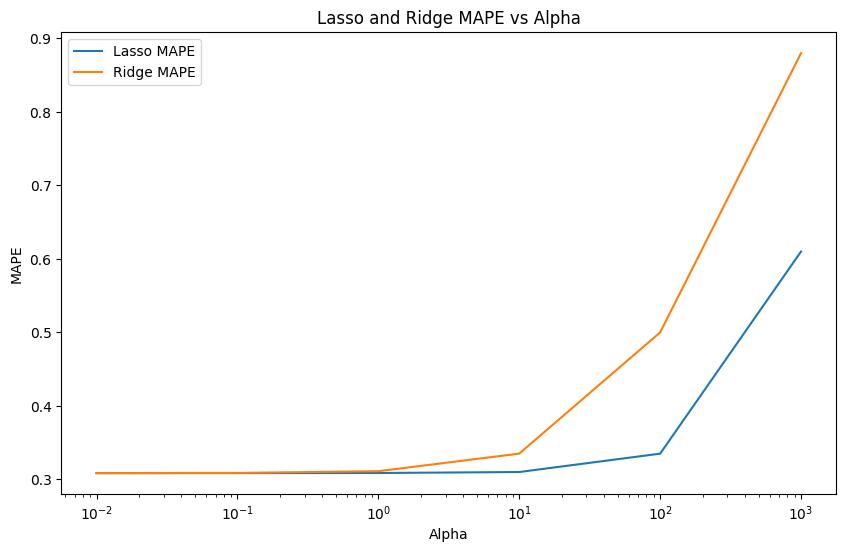

In [170]:
# TODO: Increase No. of dimensions using PolynomialFeatures from sklearn

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
# poly = PolynomialFeatures(degree=3, include_bias=False) # or can add higher degrees too!
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

alphas = [0.01, 0.1, 1, 10, 100, 1000]
lasso_mape_scores = []
ridge_mape_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000, tol=1e-4)
    ridge = Ridge(alpha=alpha)

    # lasso.fit(X_train_poly, y_train)
    # ridge.fit(X_train_poly, y_train)
    # lasso_mape = mean_absolute_percentage_error(y_test, lasso.predict(X_test_poly))
    # ridge_mape = mean_absolute_percentage_error(y_test, ridge.predict(X_test_poly))

    lasso_mape = -np.mean(cross_val_score(lasso, X_train_poly, y_train, cv=5, scoring='neg_mean_absolute_percentage_error'))
    ridge_mape = -np.mean(cross_val_score(ridge, X_train_poly, y_train, cv=5, scoring='neg_mean_absolute_percentage_error'))

    lasso_mape_scores.append(lasso_mape)
    ridge_mape_scores.append(ridge_mape)

plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_mape_scores, label='Lasso MAPE')
plt.plot(alphas, ridge_mape_scores, label='Ridge MAPE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAPE')
plt.title('Lasso and Ridge MAPE vs Alpha')
plt.legend()
plt.show()

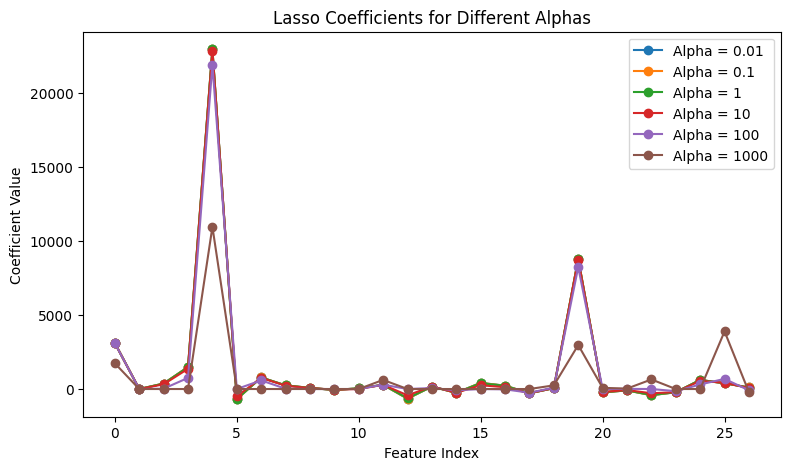

In [171]:
# Visualize coefficients for different alphas
plt.figure(figsize=(9, 5))
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000, tol=1e-4)
    lasso.fit(X_train_poly, y_train)
    plt.plot(lasso.coef_, 'o-', label=f'Alpha = {alpha}')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients for Different Alphas')
plt.legend()
plt.show()

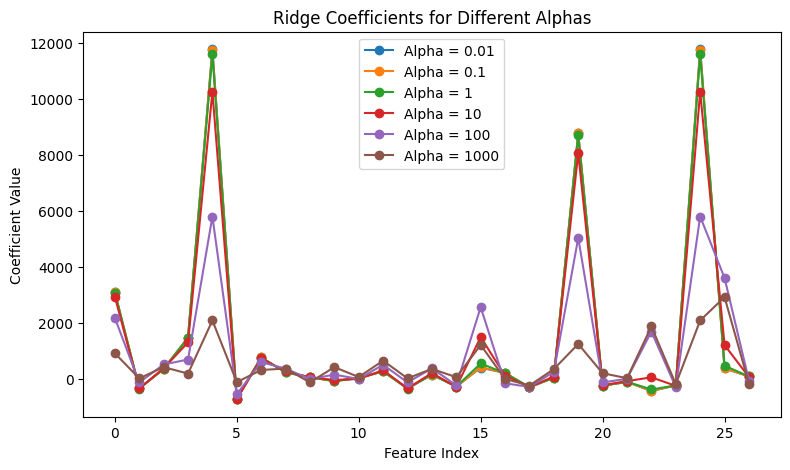

In [172]:
# Visualize coefficients for different alphas
plt.figure(figsize=(9, 5))
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly, y_train)
    plt.plot(ridge.coef_, 'o-', label=f'Alpha = {alpha}')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients for Different Alphas')
plt.legend()
plt.show()

In [173]:
lasso_mape_scores

[0.3085953054491119,
 0.3086093788953626,
 0.30874902331570075,
 0.31010308281627125,
 0.3350616740175213,
 0.6100595797365098]

In [174]:
ridge_mape_scores

[0.30862051339714325,
 0.30886110138466466,
 0.3112327362693111,
 0.3351117491669189,
 0.5000169069872349,
 0.8799064935955707]

as you can see the least MAPE score is related to Lasso with alpha 0.01 (0.3085952476151915)

Report your best model with its evaluated results.

In [175]:
# The best model is Lasso with alpha=0.01

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Lasso Regression on Polynomial Features
lasso_poly = Lasso(alpha=0.01, max_iter=10000, tol=1e-4)
lasso_poly.fit(X_train_poly, y_train)

# Predict and evaluate
lasso_poly_pred_train = lasso_poly.predict(X_train_poly)
lasso_poly_pred_test = lasso_poly.predict(X_test_poly)

lasso_poly_train_mape = mean_absolute_percentage_error(y_train, lasso_poly_pred_train)
lasso_poly_test_mape = mean_absolute_percentage_error(y_test, lasso_poly_pred_test)

print(f"Lasso Polynomial Train MAPE: {lasso_poly_train_mape:.3f}, Test MAPE: {lasso_poly_test_mape:.3f}")

Lasso Polynomial Train MAPE: 0.296, Test MAPE: 0.300


In [176]:
# TODO: Print each model's loss on the training and the test set.

models = {
    'Linear Regression': LinearRegression(),
    'Lasso (alpha=0.01)': Lasso(0.1),
    'Ridge (alpha=0.01)': Ridge(0.1),
    'Poly Linear Regression': LinearRegression(),
    'Poly Lasso (alpha=0.01)': Lasso(0.01, max_iter=10000, tol=1e-4),
    'Poly Ridge (alpha=0.01)': Ridge(0.01)
}

for name, model in models.items():
    if name.startswith('Poly'):
        model.fit(X_train_poly, y_train)
        train_mape = mean_absolute_percentage_error(y_train, model.predict(X_train_poly))
        test_mape = mean_absolute_percentage_error(y_test, model.predict(X_test_poly))
    else:
        model.fit(X_train, y_train)
        train_mape = mean_absolute_percentage_error(y_train, model.predict(X_train))
        test_mape = mean_absolute_percentage_error(y_test, model.predict(X_test))

    print(f"{name}:")
    print(f"  Training MAPE: {train_mape:.3f}")
    print(f"  Test MAPE: {test_mape:.3f}")
    print("------------------------------------------------")

Linear Regression:
  Training MAPE: 0.422
  Test MAPE: 0.471
------------------------------------------------
Lasso (alpha=0.01):
  Training MAPE: 0.422
  Test MAPE: 0.471
------------------------------------------------
Ridge (alpha=0.01):
  Training MAPE: 0.423
  Test MAPE: 0.471
------------------------------------------------
Poly Linear Regression:
  Training MAPE: 0.296
  Test MAPE: 0.300
------------------------------------------------
Poly Lasso (alpha=0.01):
  Training MAPE: 0.296
  Test MAPE: 0.300
------------------------------------------------
Poly Ridge (alpha=0.01):
  Training MAPE: 0.296
  Test MAPE: 0.300
------------------------------------------------


## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:** L1 regularization (Lasso) leads to sparser coefficients, meaning that some features may be assigned a coefficient of zero, effectively excluding them from the model. L2 regularization (Ridge), on the other hand, tends to shrink all coefficients but doesn't result in zero coefficients, leading to less sparsity. In other words, L1 (Lasso) regularization tends to produce sparse models by pushing some coefficients to exactly zero, effectively performing feature selection. This is visible in the coefficient plots where some features have zero coefficients, especially at higher alpha values. L2 (Ridge) regularization, on the other hand, shrinks all coefficients towards zero but rarely sets them exactly to zero. This results in a more even distribution of weights across all features. The L1 regularization shows higher sparsity compared to L2, which is evident from the coefficient plots where Lasso has more coefficients close to or at zero. </span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** As alpha increases, regularization has a stronger effect, shrinking the coefficients more. In Lasso, this leads to feature elimination, simplifying the model and potentially improving explainability by focusing on fewer, more important features. In Ridge, alpha increases shrink coefficients but don't eliminate them, which retains more information but may reduce clarity in feature importance.
    - For Lasso (L1), increasing alpha leads to more coefficients being set to zero, effectively selecting the most important features.
    - For Ridge (L2), increasing alpha shrinks all coefficients towards zero, but rarely sets them exactly to zero.

  This does help with model explainability:

    Lasso can improve explainability by identifying the most important features (those with non-zero coefficients).
    Ridge helps by reducing the impact of less important features without completely eliminating them.

    Both methods can prevent overfitting and make the model more interpretable by reducing the impact of less important or noisy features.
</span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:** Regularization plays a critical role in handling the additional complexity introduced by dimension expansion (e.g., polynomial features). Without regularization, high-degree polynomials can lead to overfitting, but with L1 or L2 regularization, the model is kept simpler, helping to avoid overfitting and improve generalization. In other words, When we expand the dimensions using polynomial features, the number of features increases significantly. This can lead to overfitting if not properly regulated. Regularization becomes even more important in this scenario:

    - Lasso (L1) regularization can effectively select the most important polynomial terms, setting many of the expanded features' coefficients to zero. This helps in identifying which interactions or higher-order terms are most relevant to the prediction.
    - Ridge (L2) regularization helps to control the magnitude of all coefficients, preventing any single expanded feature from dominating the model.
     
  In the expanded feature space, regularization helps to control the complexity of the model, preventing it from fitting noise in the training data. This is particularly important because polynomial expansion can easily lead to overly complex models that perform poorly on unseen data. The regularization ensures that the model remains generalizable even with the increased number of features.

</span>

<div dir="rtl">

حال با استفاه از بهترین مدلی که داریم و استفاده از پیش پردازش های بیان شده داده های موجمود در فایل
InsuranceData_test.csv
را پردازش میکنیم و خروجی های خواسته شده را در فایل submission.csv
ذخیره میکنیم.

</div>

In [178]:
# Load the test dataset
test_file_path = "./InsuranceData_test.csv"
test_df = pd.read_csv(test_file_path)

# Preprocessing for the test dataset (similar to the training data)
test_df['sex'] = LabelEncoder().fit_transform(test_df['sex'])
test_df['smoker'] = LabelEncoder().fit_transform(test_df['smoker'])
test_df['region'] = LabelEncoder().fit_transform(test_df['region'])

# Standardize the numerical features in the test dataset
test_df[['age', 'bmi']] = scaler.transform(test_df[['age', 'bmi']])

# Apply the polynomial feature expansion on the test data
X_test_poly = poly.transform(test_df)

# Use the best model according to results (Lasoo with polynomial features) to predict the charges
best_model = Lasso(alpha=0.01, max_iter=10000, tol=1e-4)
best_model.fit(X_train_poly, y_train)
predictions = best_model.predict(X_test_poly)

# Save the predictions to a CSV file
submission = pd.DataFrame({'charges': predictions})
submission.to_csv('submission.csv', index=False)

print("Predictions have been saved to submission.csv")

Predictions have been saved to submission.csv
